   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.8 MB/s eta 0:00:00
Excel file 'LP_Solver.xlsx' has been generated successfully.


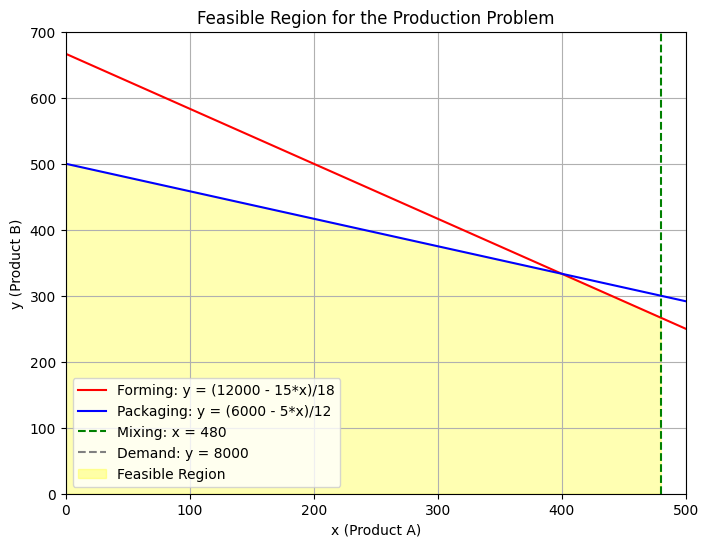

Plot saved as 'feasible_region.png'.


In [1]:
!pip install XlsxWriter matplotlib numpy

import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np

##############################
# PART 1: Create Excel File with Model Data
##############################

# Create a new Excel workbook.
workbook = xlsxwriter.Workbook('LP_Solver.xlsx')

# Worksheet 1: Data & Solver Setup
ws_data = workbook.add_worksheet("Data & Solver Setup")

# Worksheet 2: Instructions
ws_instr = workbook.add_worksheet("Instructions")

# Worksheet 3: Feasible Region Data
ws_feasible = workbook.add_worksheet("Feasible Region Data")

# Define some formats.
header_format = workbook.add_format({'bold': True, 'bg_color': '#DCE6F1'})
number_format = workbook.add_format({'num_format': '0.00'})

# --- Worksheet 1: Data & Solver Setup ---

# Decision Variables and initial values
ws_data.write('A1', 'Decision Variables', header_format)
ws_data.write('B1', 'x (Product A)')
ws_data.write('C1', 'y (Product B)')

ws_data.write('A2', 'Initial Values')
ws_data.write('B2', 0)  # Initial value for x
ws_data.write('C2', 0)  # Initial value for y

# Objective Function (Profit = 12*x + 18*y)
ws_data.write('E1', 'Objective Function (Profit)', header_format)
ws_data.write('F1', '=12*B2+18*C2', number_format)

# Constraints
# 1. Mixing Constraint: 20*x <= 9600
ws_data.write('A4', 'Mixing Constraint', header_format)
ws_data.write('B4', 'Formula: =20*B2')
ws_data.write('C4', '<= 9600')
ws_data.write('B5', '=20*B2', number_format)

# 2. Forming Constraint: 15*x + 18*y <= 12000
ws_data.write('A7', 'Forming Constraint', header_format)
ws_data.write('B7', 'Formula: =15*B2+18*C2')
ws_data.write('C7', '<= 12000')
ws_data.write('B8', '=15*B2+18*C2', number_format)

# 3. Packaging Constraint: 5*x + 12*y <= 6000
ws_data.write('A10', 'Packaging Constraint', header_format)
ws_data.write('B10', 'Formula: =5*B2+12*C2')
ws_data.write('C10', '<= 6000')
ws_data.write('B11', '=5*B2+12*C2', number_format)

# 4. Demand Constraints:
# Demand for Product A: x <= 10000
ws_data.write('A13', 'Demand A', header_format)
ws_data.write('B13', 'Formula: =B2')
ws_data.write('C13', '<= 10000')
ws_data.write('B14', '=B2', number_format)

# Demand for Product B: y <= 8000
ws_data.write('A16', 'Demand B', header_format)
ws_data.write('B16', 'Formula: =C2')
ws_data.write('C16', '<= 8000')
ws_data.write('B17', '=C2', number_format)

# Non-negativity note.
ws_data.write('A19', 'Non-negativity: x, y >= 0', header_format)

# --- Worksheet 2: Instructions ---
instructions = (
    "Solver Setup Instructions:\n"
    "1. Open the 'LP_Solver.xlsx' file in Excel.\n"
    "2. Go to the 'Data & Solver Setup' worksheet.\n"
    "3. Open the Solver add-in (Data > Solver).\n"
    "4. Set the Objective to cell F1 (Profit) and choose 'Max'.\n"
    "5. Set the Changing Variable Cells to B2 and C2 (x and y).\n"
    "6. Add the following constraints:\n"
    "   - B5 (Mixing: 20*x) <= 9600\n"
    "   - B8 (Forming: 15*x + 18*y) <= 12000\n"
    "   - B11 (Packaging: 5*x + 12*y) <= 6000\n"
    "   - B14 (Demand A: x) <= 10000\n"
    "   - B17 (Demand B: y) <= 8000\n"
    "7. Ensure that 'Make Unconstrained Variables Non-Negative' is checked.\n"
    "8. Click Solve to find the optimal solution.\n\n"
    "The 'Feasible Region Data' worksheet contains data points for plotting the constraint lines."
)
ws_instr.write('A1', instructions)

# --- Worksheet 3: Feasible Region Data ---
# We'll generate data for plotting the main constraints:
#   Forming: y = (12000 - 15*x) / 18
#   Packaging: y = (6000 - 5*x) / 12
#   Also include the vertical line for Mixing: x = 480
ws_feasible.write('A1', 'x', header_format)
ws_feasible.write('B1', 'Forming y = (12000 - 15*x)/18', header_format)
ws_feasible.write('C1', 'Packaging y = (6000 - 5*x)/12', header_format)
ws_feasible.write('D1', 'Mixing bound (x=480)', header_format)

# Create x values from 0 to 500 (since x <= 480 from mixing, 500 gives a small margin)
x_vals = np.linspace(0, 500, 51)
forming_vals = (12000 - 15*x_vals) / 18
packaging_vals = (6000 - 5*x_vals) / 12

# Write data into worksheet (starting at row 2)
for i, x in enumerate(x_vals):
    row = i + 1  # Excel rows are 0-indexed here in XlsxWriter API
    ws_feasible.write_number(row, 0, x, number_format)
    ws_feasible.write_number(row, 1, max(forming_vals[i], 0), number_format)  # y must be nonnegative
    ws_feasible.write_number(row, 2, max(packaging_vals[i], 0), number_format)
    # For the mixing bound, simply write 480 (will show as a vertical line when plotted separately)
    ws_feasible.write_number(row, 3, 480, number_format)

# Close the workbook to save the file.
workbook.close()
print("Excel file 'LP_Solver.xlsx' has been generated successfully.")

##############################
# PART 2: Plot the Feasible Region using Matplotlib
##############################

# Set up the range for x (we use 0 to 500 to include the mixing constraint).
x = np.linspace(0, 500, 400)

# Calculate y values for the Forming and Packaging constraints.
y_forming = (12000 - 15*x) / 18
y_packaging = (6000 - 5*x) / 12

# The feasible region is defined by:
#   x >= 0, y >= 0, x <= 480, y <= (12000-15*x)/18, and y <= (6000-5*x)/12.
# We plot the constraint lines.
plt.figure(figsize=(8, 6))
plt.plot(x, y_forming, label='Forming: y = (12000 - 15*x)/18', color='red')
plt.plot(x, y_packaging, label='Packaging: y = (6000 - 5*x)/12', color='blue')
plt.axvline(x=480, label='Mixing: x = 480', color='green', linestyle='--')
plt.axhline(y=8000, label='Demand: y = 8000', color='gray', linestyle='--')  # Although y<=8000 is loose here

# Shade the feasible region.
# For shading, we compute the minimum of the two constraints at each x (and consider the mixing bound).
y_feasible = np.minimum(y_forming, y_packaging)
# Only consider x up to the mixing constraint
feasible_x = x[x <= 480]
feasible_y = y_feasible[x <= 480]
# Also, the region is y>=0
plt.fill_between(feasible_x, feasible_y, color='yellow', alpha=0.3, label='Feasible Region')

plt.xlim(0, 500)
plt.ylim(0, max(y_forming[0], y_packaging[0])*1.05)
plt.xlabel('x (Product A)')
plt.ylabel('y (Product B)')
plt.title('Feasible Region for the Production Problem')
plt.legend()
plt.grid(True)

# Save the plot as a PNG file.
plt.savefig('feasible_region.png')
plt.show()

print("Plot saved as 'feasible_region.png'.")

